# 1. Load in the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

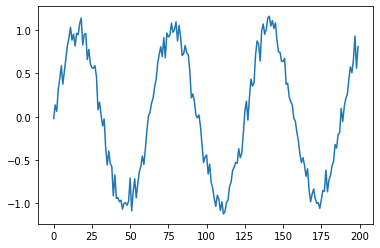

In [3]:
# Make the original Data
series = np.sin(0.1 * np.arange(200)) + np.random.randn(200) * 0.1

# plot it
plt.plot(series)

In [87]:
### build the dataset
T = 25
D = 1
X = []
Y = []
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
# Input shape will be NxTxD, output will be NxK
X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print(f"X.shape {X.shape}, Y.shape {Y.shape}")

X.shape (175, 25, 1), Y.shape (175,)


# 2. Build & Train the model

In [88]:
# Try AutoRegressive RNN model
i = Input(shape=(T, 1))
x = SimpleRNN(5, activation=None)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(loss='mse', optimizer=Adam(lr=0.1))

# Train the RNN
r = model.fit(X[:-N//2], Y[:N//2], epochs=80, 
              validation_data=(X[-N//2:], Y[N//2:]))

Train on 87 samples, validate on 88 samples
Epoch 1/80
87/87 [==============================] - 2s 17ms/sample - loss: 2.2362 - val_loss: 0.4026
Epoch 2/80
87/87 [==============================] - 0s 1ms/sample - loss: 0.4765 - val_loss: 0.3641
Epoch 3/80
87/87 [==============================] - 0s 1ms/sample - loss: 0.4307 - val_loss: 0.4092
Epoch 4/80
87/87 [==============================] - 0s 1ms/sample - loss: 0.4413 - val_loss: 0.2886
Epoch 5/80
87/87 [==============================] - 0s 1ms/sample - loss: 0.3151 - val_loss: 0.2599
Epoch 6/80
87/87 [==============================] - 0s 1ms/sample - loss: 0.3256 - val_loss: 0.3313
Epoch 7/80
87/87 [==============================] - 0s 1ms/sample - loss: 0.3327 - val_loss: 0.5817
Epoch 8/80
87/87 [==============================] - 0s 1ms/sample - loss: 0.4805 - val_loss: 0.2548
Epoch 9/80
87/87 [==============================] - 0s 944us/sample - loss: 0.2321 - val_loss: 0.1794
Epoch 10/80
87/87 [==============================] - 

# 3. Evaluate the model

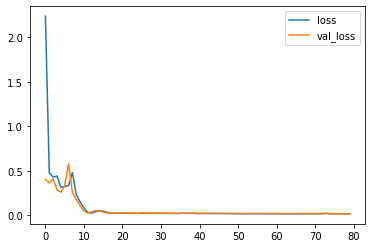

In [89]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# 4. Make predictions

In [90]:
# Wrong forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N // 2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
    i += 1
    
    # update the predicitions list
    validation_predictions.append(p)

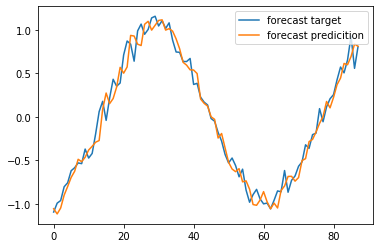

In [91]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predicition')
plt.legend()

In [92]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1, 1))[0, 0] # 1x1 array -> scalar
    
    # update the predictions list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

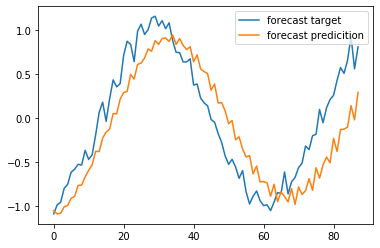

In [93]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predicition')
plt.legend()